In [54]:
from sqlalchemy import create_engine
from config import password
import pandas as pd
import matplotlib.pyplot as plt

engine = create_engine('postgresql://postgres:'+ password + '@localhost:5432/sql_challenge_DB')
connection = engine.connect()

In [55]:
sql_query = pd.read_sql_query('SELECT s.emp_no, s.salary, t.title FROM salaries s JOIN employees e ON s.emp_no=e.emp_no JOIN titles t ON e.emp_title_id=t.title_id;', connection)
df = pd.DataFrame(sql_query)
Null = df.isnull().sum()
df.head()

,emp_no,salary,title
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer


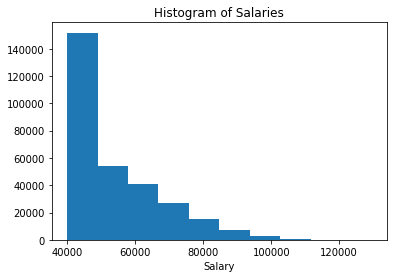

In [56]:
# create histogram of salaries
plt.hist(df["salary"])
plt.xlabel("Salary")
plt.title("Histogram of Salaries")
plt.show()

In [57]:
group = df.groupby(['title'])
group.count()

,emp_no,salary
title,,
Assistant Engineer,5835,5835
Engineer,47303,47303
Manager,24,24
Senior Engineer,97747,97747
Senior Staff,26583,26583
Staff,107384,107384
Technique Leader,15148,15148


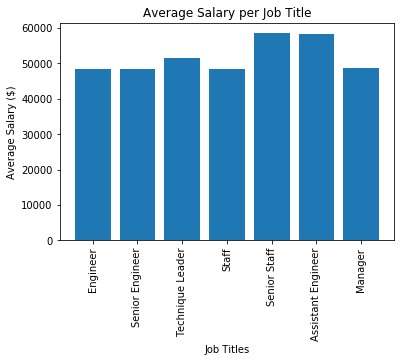

In [58]:
x = df["title"].unique()
y = group["salary"].mean()
plt.bar(x, y)
plt.xlabel("Job Titles")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary per Job Title")
plt.xticks(rotation=90)
plt.show()

Assistant engineer makes more on average than the senior engineer and the engineer title which doesn't look right and means that the data may be suspicious.

In [59]:
salary = df["salary"].loc[df["emp_no"]==499942]
print(salary)

42305    40000
Name: salary, dtype: int64
